In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

In [2]:
tab = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv",header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
tab.columns = headers

pd.set_option('display.max_columns',None)

In [3]:
tab.replace("?", np.nan, inplace = True)
tab.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [102]:
tab.groupby(["make",'drive-wheels']).size().reset_index(name='count')

,make,drive-wheels,count
0,alfa-romero,rwd,3
1,audi,4wd,2
2,audi,fwd,5
3,bmw,rwd,8
4,chevrolet,fwd,3
5,dodge,fwd,9
6,honda,fwd,13
7,isuzu,fwd,2
8,isuzu,rwd,2
9,jaguar,rwd,3


In [4]:
# list of numerical variables
n_features = [feature for feature in tab.columns if tab[feature].dtypes != 'O']

print('Number of numerical variables: ', len(n_features))


# for feature in n_features:
#     print('col_name : {} and no. of unique categories are {}'.format(feature,len(tab[feature].unique())))


# visualise the numerical variables
tab[n_features].head()

Number of numerical variables:  10


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [5]:
# list of numerical variables
o_features = [feature for feature in tab.columns if tab[feature].dtypes == 'O']


print('Number of categorial variables: ', len(o_features))

#for feature in o_features:
#    print('col_name : {} and no. of unique categories are {}'.format(feature,len(tab[feature].unique())))

# visualise the numerical variables
tab[o_features].head() 

Number of categorial variables:  16


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450


In [6]:
missing_data = tab.isnull().sum()
missing_data

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
mean=tab["normalized-losses"].astype("float").mean(axis=0)
tab["normalized-losses"].replace(np.nan, mean, inplace=True)

In [8]:
mean=tab["stroke"].astype("float").mean(axis=0)
tab["stroke"].replace(np.nan, mean, inplace=True)

In [9]:
mean=tab["bore"].astype("float").mean(axis=0)
tab["bore"].replace(np.nan, mean, inplace=True)

In [10]:
mean=tab["horsepower"].astype("float").mean(axis=0)
tab['horsepower'].replace(np.NaN,mean,inplace=True)

In [11]:
mean=tab["peak-rpm"].astype("float").mean(axis=0)
tab["peak-rpm"].replace(np.nan, mean, inplace=True)

In [12]:
tab["num-of-doors"].replace(np.nan,4, inplace=True)

In [13]:
tab['price'].replace(np.NaN,"0",inplace=True)
tab["price"]=tab["price"].astype(float)

In [14]:
missing_data = tab.isnull().sum()
missing_data

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
tab["horsepower"].value_counts().to_frame()

,horsepower
68,19
70,11
69,10
116,9
110,8
95,7
88,6
62,6
101,6
160,6


In [16]:
tab["horsepower"]=tab["horsepower"].astype(int, copy=True)

In [17]:
tab["horsepower"].value_counts().to_frame()

,horsepower
68,19
70,11
69,10
116,9
110,8
95,7
88,6
62,6
101,6
160,6


Text(0.5, 1.0, 'horsepower bins')

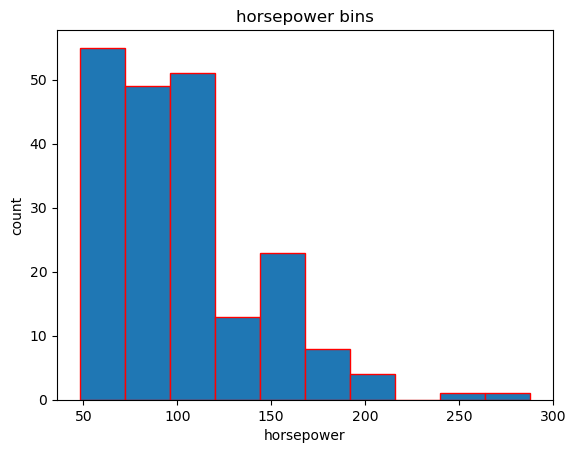

In [18]:
# plt.hist(tab["horsepower"],ec="red",color='teal',orientation ="horizontal",rwidth=0.8)
plt.hist(tab["horsepower"],ec="red")
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [19]:
bins = np.linspace(min(tab["horsepower"]), max(tab["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [20]:
group_names = ['Low', 'Medium', 'High']

In [21]:
tab['horsepower-binned'] = pd.cut(tab['horsepower'], bins, labels=group_names, include_lowest=True )
tab[['horsepower','horsepower-binned']].head(15)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


Text(0.5, 1.0, 'horsepower bins')

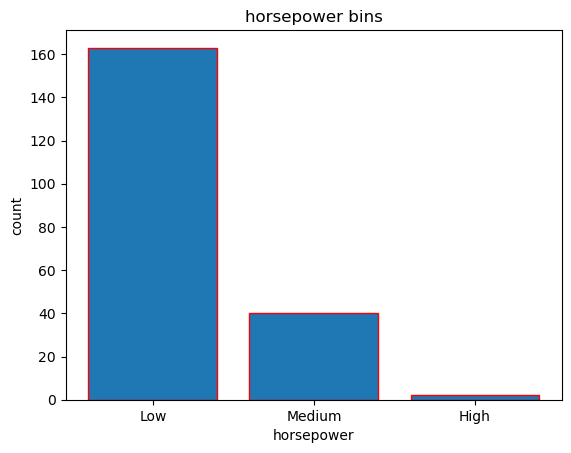

In [22]:
pyplot.bar(group_names, tab["horsepower-binned"].value_counts(),ec="red")

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

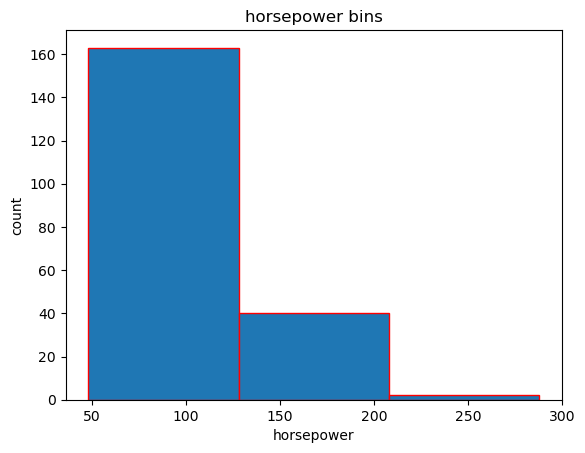

In [23]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(tab["horsepower"], bins = 3,ec="red")

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [24]:
dummy_variable_1 = pd.get_dummies(tab["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [25]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [26]:
# merge data frame "df" and "dummy_variable_1" 
tab = pd.concat([tab, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
tab.drop("fuel-type", axis = 1, inplace=True)

In [27]:
tab.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Low,0,1


In [28]:
dummy_variable_2 = pd.get_dummies(tab["aspiration"])
# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [29]:
#merge the new dataframe to the original datafram
tab = pd.concat([tab, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
tab.drop('aspiration', axis = 1, inplace=True)

In [30]:
tab

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,Low,0,1,1,0
201,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,Medium,0,1,0,1
202,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,Medium,0,1,1,0
203,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,Low,1,0,0,1


In [31]:
tab.corr(numeric_only=True)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,-0.035823,0.034606,-0.071461,-0.194311,0.194311,0.059866,-0.059866
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.470414,-0.544082,0.578804,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.670909,-0.704662,0.685019,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.642704,-0.677218,0.695654,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.048640,-0.107358,0.158436,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.757414,-0.797465,0.799773,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.653658,-0.677470,0.838097,0.069594,-0.069594,-0.108217,0.108217
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,0.324701,0.265201,0.077959,0.984356,-0.984356,-0.295541,0.295541
horsepower,0.071380,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,-0.803140,-0.770905,0.703548,-0.165169,0.165169,-0.240212,0.240212
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,-0.803140,1.000000,0.971337,-0.660026,0.255963,-0.255963,0.202362,-0.202362


In [32]:
tab["bore"]=tab["bore"].astype(float)

In [33]:
tab.corr(numeric_only=True)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.178515,0.071380,-0.035823,0.034606,-0.071461,-0.194311,0.194311,0.059866,-0.059866
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.249786,0.351985,-0.470414,-0.544082,0.578804,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.158414,0.554408,-0.670909,-0.704662,0.685019,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.181129,0.642176,-0.642704,-0.677218,0.695654,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,0.261214,-0.110114,-0.048640,-0.107358,0.158436,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.151362,0.750973,-0.757414,-0.797465,0.799773,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.028971,0.810705,-0.653658,-0.677470,0.838097,0.069594,-0.069594,-0.108217,0.108217
bore,-0.130083,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,0.005201,0.575707,-0.584508,-0.586992,0.524038,0.054457,-0.054457,-0.212623,0.212623
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005201,1.000000,-0.205717,0.324701,0.265201,0.077959,0.984356,-0.984356,-0.295541,0.295541
horsepower,0.071380,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,0.575707,-0.205717,1.000000,-0.803140,-0.770905,0.703548,-0.165169,0.165169,-0.240212,0.240212


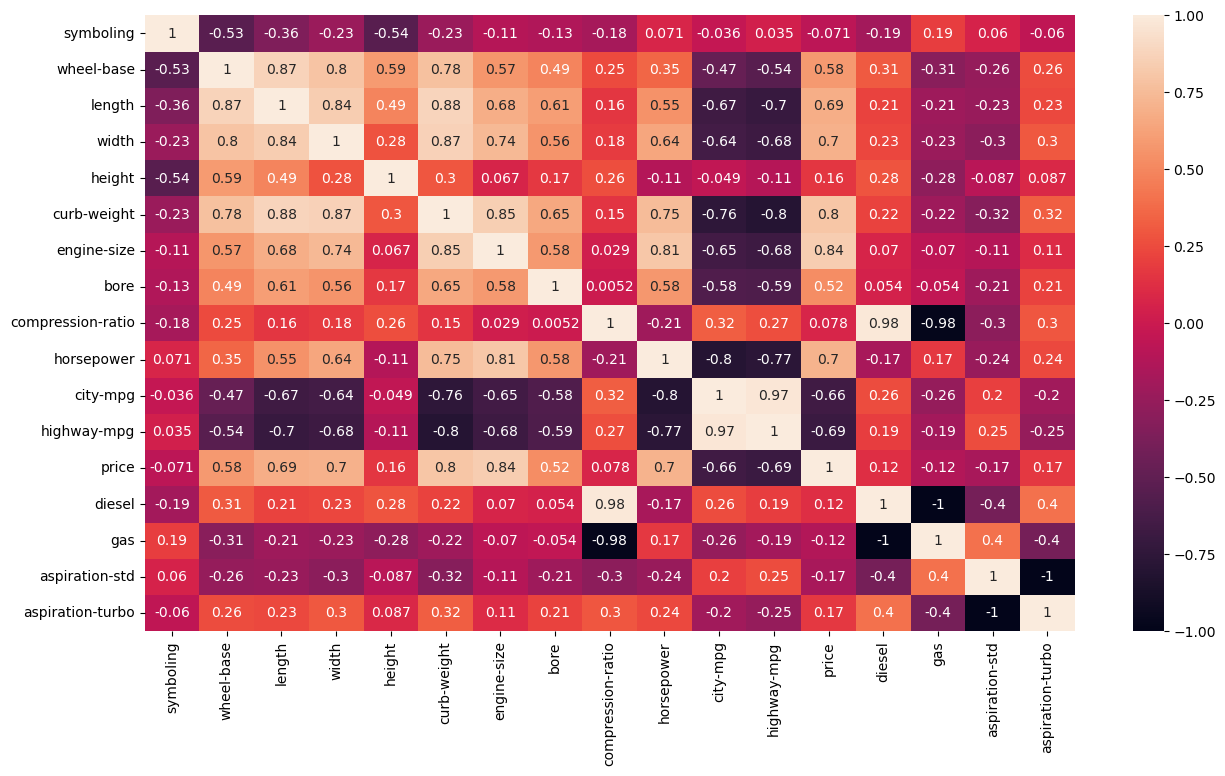

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(tab.corr(numeric_only=True),annot=True)
plt.title=("corelation between the columns")

In [35]:
tab.corr(numeric_only=True)['price'].sort_values(ascending =False)

price                1.000000
engine-size          0.838097
curb-weight          0.799773
horsepower           0.703548
width                0.695654
length               0.685019
wheel-base           0.578804
bore                 0.524038
aspiration-turbo     0.166891
height               0.158436
diesel               0.117852
compression-ratio    0.077959
symboling           -0.071461
gas                 -0.117852
aspiration-std      -0.166891
city-mpg            -0.660026
highway-mpg         -0.687675
Name: price, dtype: float64

<Axes: xlabel='length', ylabel='price'>

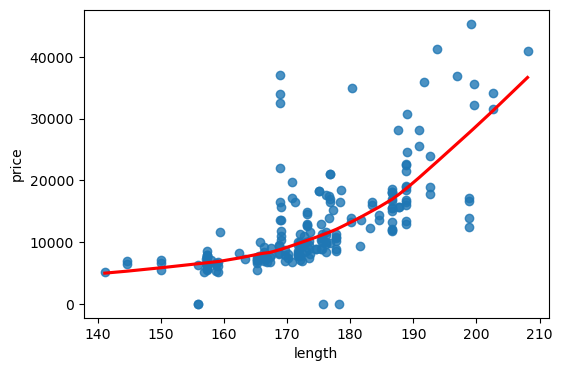

In [36]:
plt.figure(figsize = (6,4))
sns.regplot(x="length", y="price", data=tab,lowess=True,line_kws=dict(color="r"))

<Axes: xlabel='width', ylabel='price'>

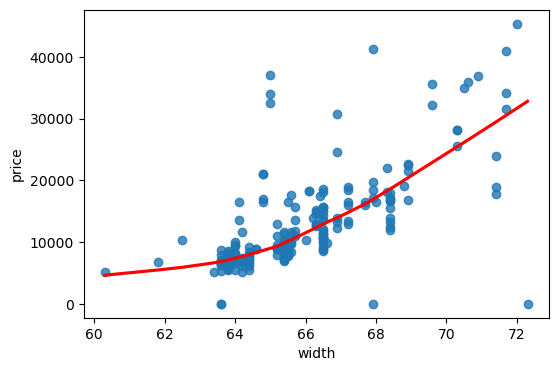

In [37]:
plt.figure(figsize = (6,4))
sns.regplot(x="width", y="price", data=tab,lowess=True,line_kws=dict(color="r"))

<Axes: xlabel='horsepower', ylabel='price'>

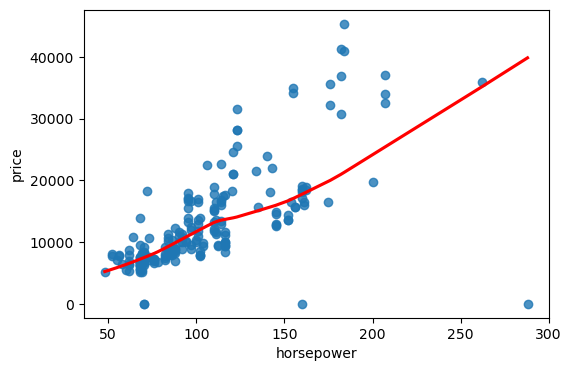

In [38]:
plt.figure(figsize = (6,4))
sns.regplot(x="horsepower", y="price", data=tab,lowess=True,line_kws=dict(color="r"))

<Axes: xlabel='curb-weight', ylabel='price'>

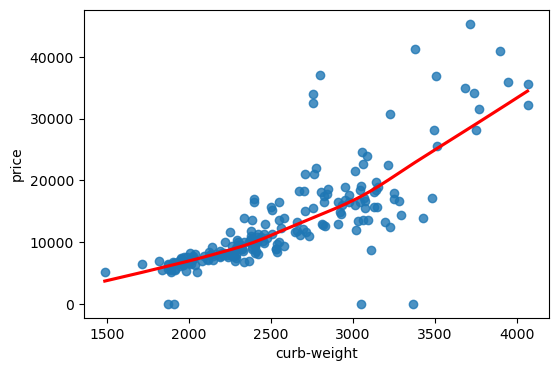

In [39]:
plt.figure(figsize = (6,4))
sns.regplot(x="curb-weight", y="price", data=tab,lowess=True,line_kws=dict(color="r"))

<Axes: xlabel='engine-size', ylabel='price'>

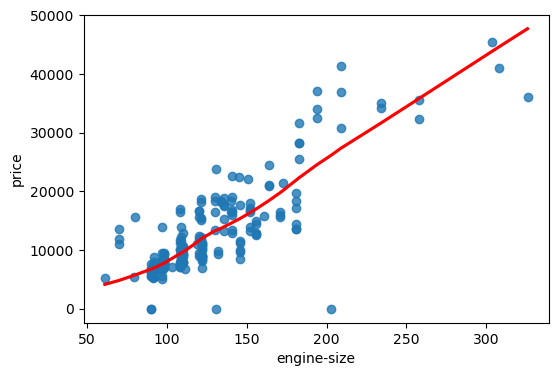

In [40]:
plt.figure(figsize = (6,4))
sns.regplot(x="engine-size", y="price", data=tab,lowess=True,line_kws=dict(color="r"))

<Axes: xlabel='wheel-base', ylabel='price'>

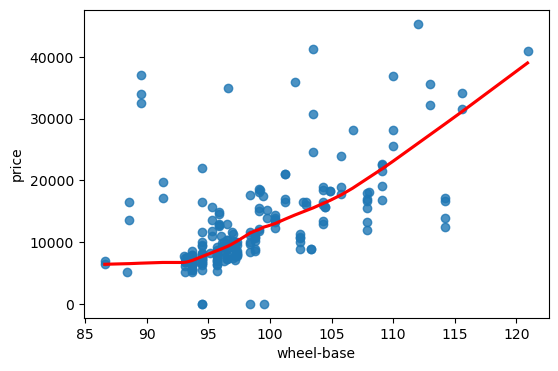

In [41]:
plt.figure(figsize = (6,4))
sns.regplot(x="wheel-base", y="price", data=tab,lowess=True,line_kws=dict(color="r"))

<Axes: xlabel='bore', ylabel='price'>

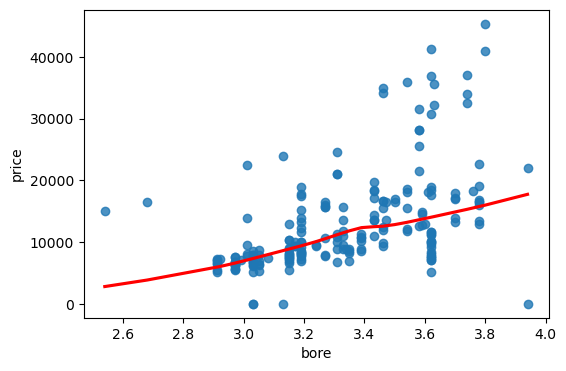

In [42]:
plt.figure(figsize = (6,4))
sns.regplot(x="bore", y="price", data=tab,lowess=True,line_kws=dict(color="r"))

<Axes: xlabel='city-mpg', ylabel='price'>

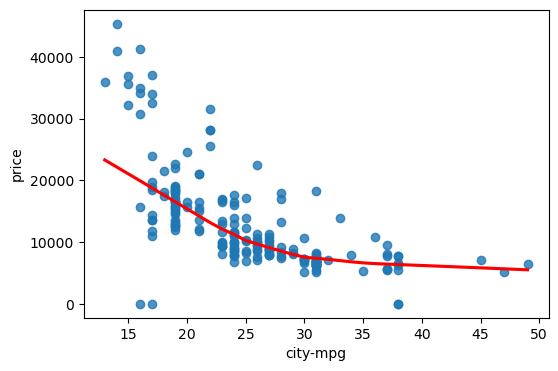

In [43]:
plt.figure(figsize = (6,4))
sns.regplot(x="city-mpg", y="price", data=tab,lowess=True,line_kws=dict(color="r"))

<Axes: xlabel='highway-mpg', ylabel='price'>

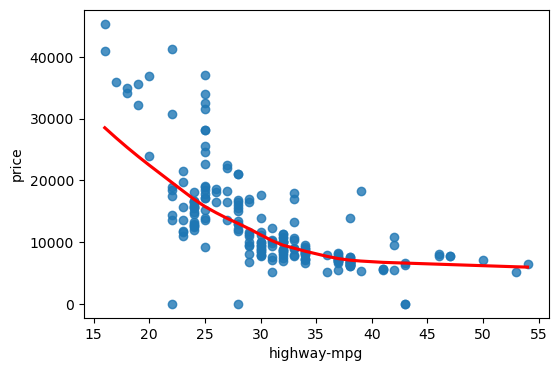

In [44]:
plt.figure(figsize = (6,4))
sns.regplot(x="highway-mpg", y="price", data=tab,lowess=True,line_kws=dict(color="r"))

In [45]:
tab.corr(numeric_only=True)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.178515,0.071380,-0.035823,0.034606,-0.071461,-0.194311,0.194311,0.059866,-0.059866
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.249786,0.351985,-0.470414,-0.544082,0.578804,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.158414,0.554408,-0.670909,-0.704662,0.685019,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.181129,0.642176,-0.642704,-0.677218,0.695654,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,0.261214,-0.110114,-0.048640,-0.107358,0.158436,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.151362,0.750973,-0.757414,-0.797465,0.799773,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.028971,0.810705,-0.653658,-0.677470,0.838097,0.069594,-0.069594,-0.108217,0.108217
bore,-0.130083,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,0.005201,0.575707,-0.584508,-0.586992,0.524038,0.054457,-0.054457,-0.212623,0.212623
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005201,1.000000,-0.205717,0.324701,0.265201,0.077959,0.984356,-0.984356,-0.295541,0.295541
horsepower,0.071380,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,0.575707,-0.205717,1.000000,-0.803140,-0.770905,0.703548,-0.165169,0.165169,-0.240212,0.240212


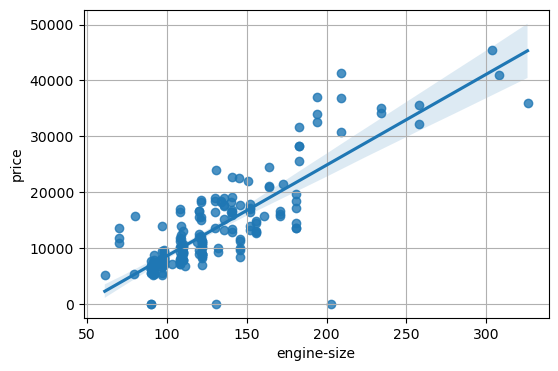

In [46]:
plt.figure(figsize = (6,4))
sns.regplot(x="engine-size", y="price", data=tab)
plt.grid()

In [47]:
tab[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.838097
price,0.838097,1.000000


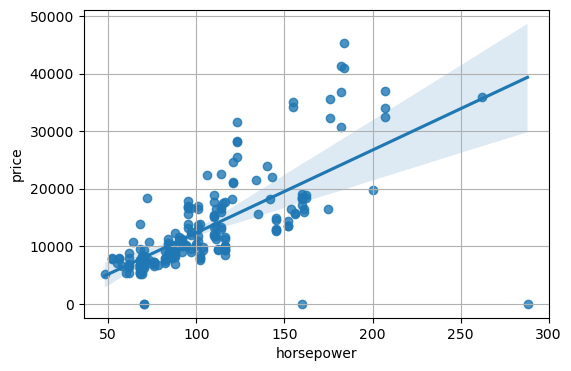

In [48]:
plt.figure(figsize = (6,4))
sns.regplot(x="horsepower", y="price", data=tab)
plt.grid()

In [49]:
tab[["horsepower", "price"]].corr()

,horsepower,price
horsepower,1.000000,0.703548
price,0.703548,1.000000


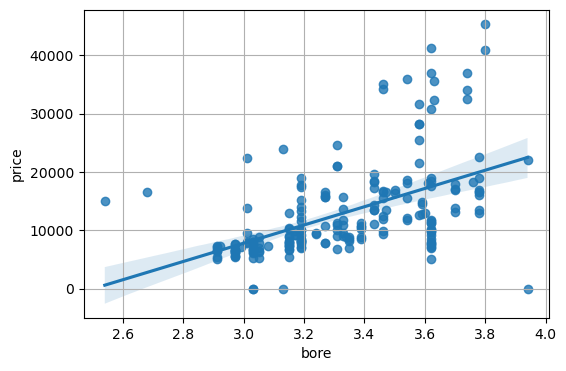

In [50]:
plt.figure(figsize = (6,4))
sns.regplot(x="bore", y="price", data=tab)
plt.grid()

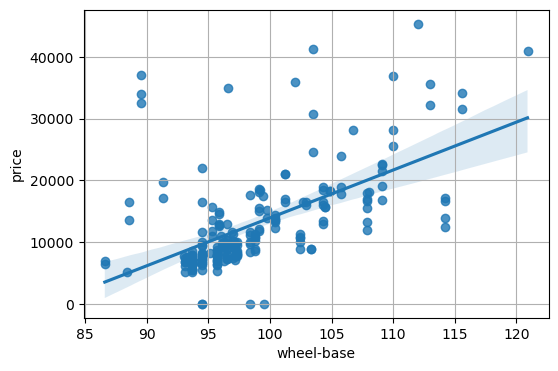

In [51]:
plt.figure(figsize = (6,4))
sns.regplot(x="wheel-base", y="price", data=tab)
plt.grid()

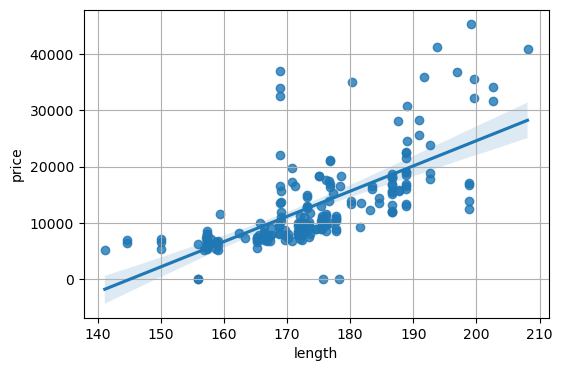

In [52]:
plt.figure(figsize = (6,4))
sns.regplot(x="length", y="price", data=tab)
plt.grid()

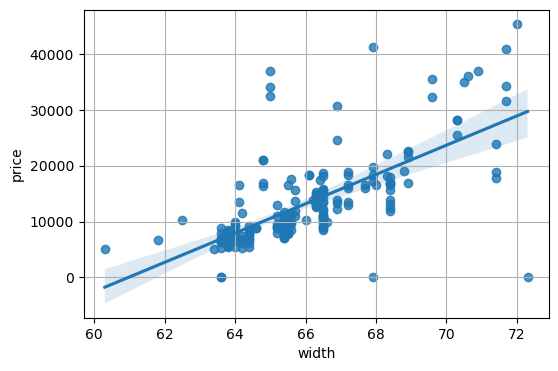

In [53]:
plt.figure(figsize = (6,4))
sns.regplot(x="width", y="price", data=tab)
plt.grid()

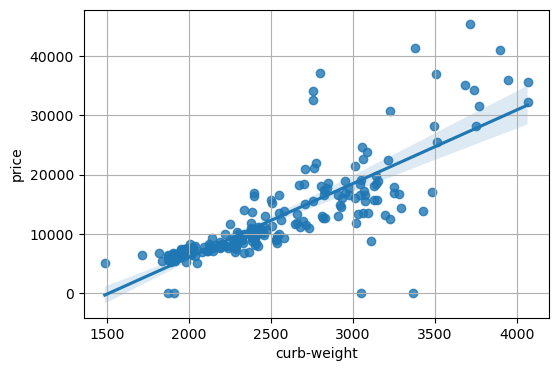

In [54]:
plt.figure(figsize = (6,4))
sns.regplot(x="curb-weight", y="price", data=tab)
plt.grid()

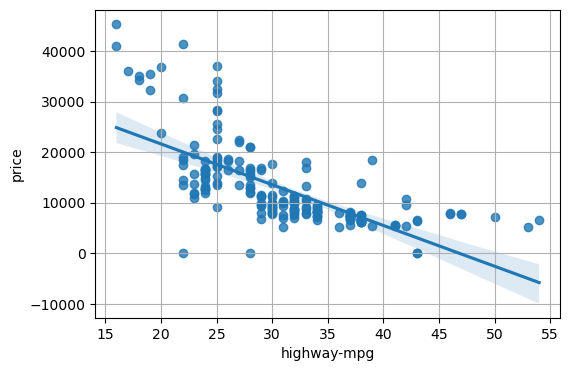

In [55]:
plt.figure(figsize = (6,4))
sns.regplot(x="highway-mpg", y="price", data=tab)
plt.grid()

In [56]:
tab[["city-mpg", "price"]].corr()

,city-mpg,price
city-mpg,1.000000,-0.660026
price,-0.660026,1.000000


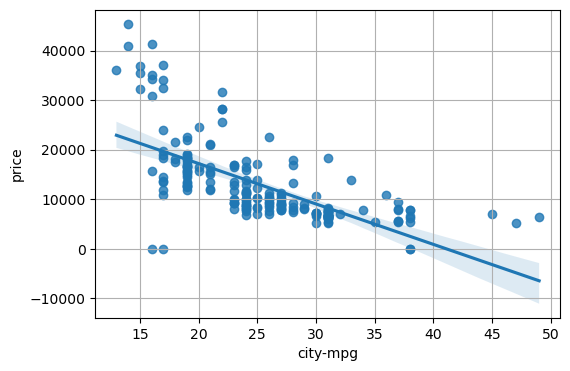

In [57]:
plt.figure(figsize = (6,4))
sns.regplot(x="city-mpg", y="price", data=tab)
plt.grid()

In [58]:
tab[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.687675
price,-0.687675,1.000000


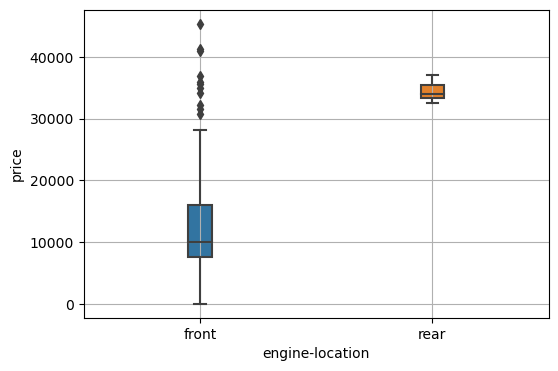

In [59]:
plt.figure(figsize = (6,4))
sns.boxplot(x="engine-location", y="price", data=tab,width=0.1)
plt.grid()

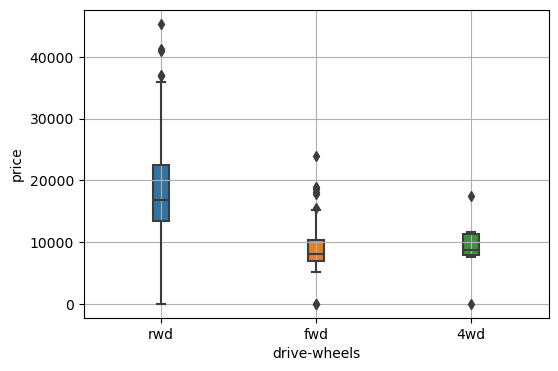

In [60]:
plt.figure(figsize = (6,4))
sns.boxplot(x="drive-wheels", y="price", data=tab,width=0.1)
plt.grid()

In [61]:
G1 = tab[['drive-wheels','body-style','price']]
G1.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [62]:
G2 = G1.groupby(['drive-wheels'],as_index=False).mean(numeric_only=True)
G2

,drive-wheels,price
0,4wd,9103.111111
1,fwd,9090.700000
2,rwd,19497.644737


In [63]:
G3 = tab[['drive-wheels','body-style','price']]
grouped = G3.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped

,drive-wheels,body-style,price
0,4wd,hatchback,3801.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9467.526316
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [64]:
g_pivot = grouped.pivot(index='drive-wheels',columns='body-style')
g_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [65]:
g_pivot = g_pivot.fillna(0) #fill missing values with 0
g_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [66]:
# grouping results
G4 = tab[['body-style','price']]
g_test = G4.groupby(['body-style'],as_index= False).mean()
g_test

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9672.942857
3,sedan,14158.510417
4,wagon,12371.960000


In [67]:
G4=G3[['drive-wheels', 'price']].groupby(['drive-wheels'])
G4.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
9,4wd,0.0


In [68]:
G3

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [69]:
G4.get_group('4wd')['price']

4      17450.0
9          0.0
140     7603.0
144     9233.0
145    11259.0
148     8013.0
149    11694.0
154     7898.0
155     8778.0
Name: price, dtype: float64

In [70]:
G4.get_group('fwd')['price']

3      13950.0
5      15250.0
6      17710.0
7      18920.0
8      23875.0
        ...   
189    11595.0
190     9980.0
191    13295.0
192    13845.0
193    12290.0
Name: price, Length: 120, dtype: float64

In [71]:
G4.get_group('rwd')['price']

0      13495.0
1      16500.0
2      16500.0
10     16430.0
11     16925.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 76, dtype: float64

In [72]:
f_val, p_val = stats.f_oneway(G4.get_group('fwd')['price'], G4.get_group('rwd')['price'], G4.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 64.28440184196305 , P = 2.4833608991365896e-22


In [73]:
f_val, p_val = stats.f_oneway(G4.get_group('fwd')['price'], G4.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 122.70383417024505 , P = 2.0574853192713905e-22


In [74]:
f_val, p_val = stats.f_oneway(G4.get_group('4wd')['price'], G4.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 10.837775810874803 , P = 0.0014620960345262835


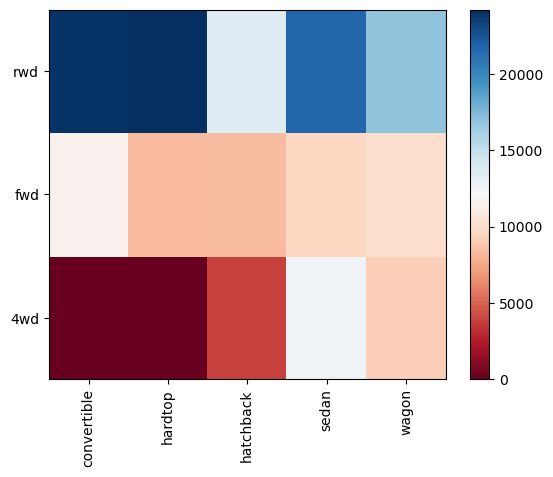

In [75]:
fig, ax = plt.subplots()
im = ax.pcolor(g_pivot, cmap='RdBu')

#label names
row_labels = g_pivot.columns.levels[1]
col_labels = g_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(g_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(g_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [76]:
pearson_coef, p_value = stats.pearsonr(tab['wheel-base'], tab['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.578803962928959  with a P-value of P = 9.919365981337438e-20


In [77]:
pearson_coef, p_value = stats.pearsonr(tab['horsepower'], tab['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7035475371691151  with a P-value of P =  6.083089039038012e-32


In [78]:
pearson_coef, p_value = stats.pearsonr(tab['length'], tab['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6850187941867718  with a P-value of P =  9.67973611922646e-30


In [79]:
pearson_coef, p_value = stats.pearsonr(tab['width'], tab['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.695654497449731  with a P-value of P = 5.5273199576558276e-31


In [80]:
pearson_coef, p_value = stats.pearsonr(tab['curb-weight'], tab['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7997728040770844  with a P-value of P =  7.123463194280533e-47


In [81]:
pearson_coef, p_value = stats.pearsonr(tab['engine-size'], tab['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.838097285838633  with a P-value of P = 2.4898087727398237e-55


In [82]:
pearson_coef, p_value = stats.pearsonr(tab['bore'], tab['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5240378004115125  with a P-value of P =   7.422310056206762e-16


In [83]:
pearson_coef, p_value = stats.pearsonr(tab['city-mpg'], tab['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6600259399668419  with a P-value of P =  5.1144609304185476e-27


In [84]:
pearson_coef, p_value = stats.pearsonr(tab['highway-mpg'], tab['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.6876750740856994  with a P-value of P =  4.789993211390672e-30


In [85]:
import statsmodels.api as sm
# Prepare your data: X as independent variables, y as the dependent variable
# Add a constant term to the independent variables
a = tab[['city-mpg','highway-mpg','engine-size']] 
b = tab['price']
# a = sm.add_constant(a) 
# remove constant , if p value is grester than alpha
# include constant, if  p value is less than alpha
# Fit the OLS regression model
results = sm.OLS(b,a).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              813.7
Date:                Sat, 08 Jul 2023   Prob (F-statistic):                   1.75e-112
Time:                        13:46:28   Log-Likelihood:                         -2002.0
No. Observations:                 205   AIC:                                      4010.
Df Residuals:                     202   BIC:                                      4020.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
city-mpg       40.5060    186.138      0.218      0.828    -326.518     407.530
highway-mpg  -216.0012    161.234     -1.340      0.182    -533.920     101.917
engine-size   145.9639      5.012     29.126      0.000     136.082     155.846
==============================================================================
Omnibus:                       45.739   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.792
Skew:                          -0.575   Prob(JB):                     6.62e-72
Kurtosis:                       9.087   Cond. No.                         115.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""